In [1]:
#import the libraries
import pandas as pd
from scipy import stats
import numpy as np

#read the datas
test_data = pd.read_csv("data/test_lAUu6dG.csv")
train_data = pd.read_csv("data/train_ctrUa4K.csv")

train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [2]:
train_data.shape

(614, 13)

In [3]:
test_data.shape

(367, 12)

In [4]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
original_data = train_data.copy()
original_test_data = test_data.copy()

#fill the nan values
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace = True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace = True)
train_data['Credit_History'].fillna(train_data['Credit_History'].median(), inplace = True)

train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace = True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace = True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace = True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace = True)


test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace = True)
test_data['Credit_History'].fillna(test_data['Credit_History'].median(), inplace = True)

test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace = True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace = True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace = True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace = True)

In [7]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## Checking for outliers

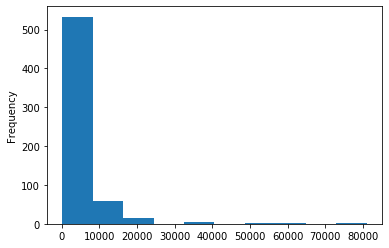

In [9]:
train_data['ApplicantIncome'].plot(kind = 'hist')

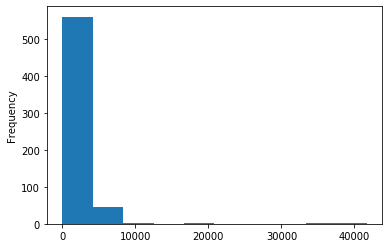

In [10]:
train_data['CoapplicantIncome'].plot(kind = 'hist')

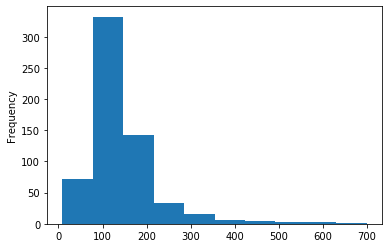

In [11]:
train_data['LoanAmount'].plot(kind = 'hist')

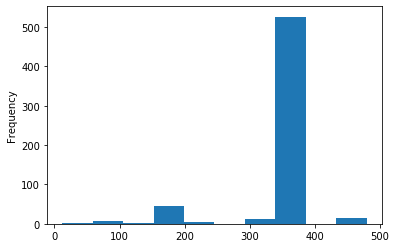

In [12]:
train_data['Loan_Amount_Term'].plot(kind = 'hist')

In [13]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


In [14]:
#apply the log transformation to the numeric columns (remove outliers) (train data)
train_data["ApplicantIncome_log"] = train_data["ApplicantIncome"].map(lambda i: np.log(i) if i > 0 else 0)
train_data["CoapplicantIncome_log"] = train_data["CoapplicantIncome"].map(lambda i: np.log(i) if i > 0 else 0)
train_data["LoanAmount_log"] = train_data["LoanAmount"].map(lambda i: np.log(i) if i > 0 else 0)

train_data = train_data.drop(columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

columns_name = train_data.columns
reordered_columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
                     'Self_Employed',  'ApplicantIncome_log', 'CoapplicantIncome_log',
                     'LoanAmount_log', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
                     'Loan_Status']

train_data = train_data[reordered_columns]


#apply the log transformation to the numeric columns (remove outliers) (test data)
test_data["ApplicantIncome_log"] = test_data["ApplicantIncome"].map(lambda i: np.log(i) if i > 0 else 0)
test_data["CoapplicantIncome_log"] = test_data["CoapplicantIncome"].map(lambda i: np.log(i) if i > 0 else 0)
test_data["LoanAmount_log"] = test_data["LoanAmount"].map(lambda i: np.log(i) if i > 0 else 0)

test_data = test_data.drop(columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

reordered_columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
                     'Self_Employed',  'ApplicantIncome_log', 'CoapplicantIncome_log',
                     'LoanAmount_log', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

test_data = test_data[reordered_columns]

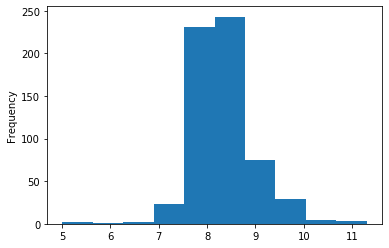

In [15]:
train_data['ApplicantIncome_log'].plot(kind = 'hist')

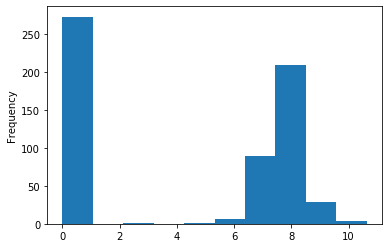

In [16]:
train_data['CoapplicantIncome_log'].plot(kind = 'hist')

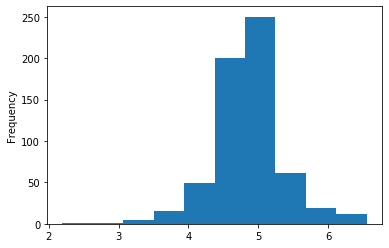

In [17]:
train_data['LoanAmount_log'].plot(kind = 'hist')

In [18]:
train_data.describe()

,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,8.341213,4.289733,4.857250,342.410423,0.855049
std,0.645263,3.875680,0.495996,64.428629,0.352339
min,5.010635,0.000000,2.197225,12.000000,0.000000
25%,7.964677,0.000000,4.607658,360.000000,1.000000
50%,8.246040,7.080284,4.852030,360.000000,1.000000
75%,8.664750,7.739462,5.104426,360.000000,1.000000
max,11.302204,10.637465,6.551080,480.000000,1.000000


In [19]:
#mapping the binary columns and transforming the columns' type to numeric (train data)
train_data['Loan_Status'] = train_data['Loan_Status'].map({'Y': 1, 'N': 0})
train_data['Loan_Status'] = pd.to_numeric(train_data['Loan_Status'], errors='coerce')

train_data['Married'] = train_data['Married'].map({'Yes': 1, 'No': 0})
train_data['Married'] = pd.to_numeric(train_data['Married'], errors='coerce')

train_data['Self_Employed'] = train_data['Self_Employed'].map({'Yes': 1, 'No': 0})
train_data['Self_Employed'] = pd.to_numeric(train_data['Self_Employed'], errors='coerce')

#drop loan id column (train data)
train_data = train_data.drop(columns = ['Loan_ID'])


#mapping the binary columns and transforming the columns' type to numeric (test data)
test_data['Married'] = test_data['Married'].map({'Yes': 1, 'No': 0})
test_data['Married'] = pd.to_numeric(test_data['Married'], errors='coerce')

test_data['Self_Employed'] = test_data['Self_Employed'].map({'Yes': 1, 'No': 0})
test_data['Self_Employed'] = pd.to_numeric(test_data['Self_Employed'], errors='coerce')

#drop loan id column (test data)
test_data = test_data.drop(columns = ['Loan_ID'])

In [20]:
#create dummies of the strings columns
string_columns = train_data.select_dtypes(include = 'object')

for column in string_columns:
    
    dummie = pd.get_dummies(train_data[column], drop_first = True)
    train_data[column + "_" + dummie.columns] = dummie
    
    dummie2 = pd.get_dummies(test_data[column], drop_first = True)
    test_data[column + "_" + dummie2.columns] = dummie2

train_data = train_data.drop(columns = string_columns)
test_data = test_data.drop(columns = string_columns)

In [21]:
train_data.dtypes

Married                      int64
Self_Employed                int64
ApplicantIncome_log        float64
CoapplicantIncome_log      float64
LoanAmount_log             float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Gender_Male                  uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Not Graduate       uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [22]:
columns = train_data.columns
reordered_columns = ['Gender_Male', 'Married', 'Dependents_1', 'Dependents_2', 'Dependents_3+',  'Education_Not Graduate', 
                     'Self_Employed', 'ApplicantIncome_log',
                     'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term',
                     'Credit_History', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status']

train_data = train_data[reordered_columns]

reordered_columns2 = ['Gender_Male', 'Married', 'Dependents_1', 'Dependents_2', 'Dependents_3+',  'Education_Not Graduate', 
                     'Self_Employed', 'ApplicantIncome_log',
                     'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term',
                     'Credit_History', 'Property_Area_Semiurban', 'Property_Area_Urban']

test_data = test_data[reordered_columns2]

train_data

,Gender_Male,Married,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,1,0,0,0,0,0,0,8.674026,0.000000,4.852030,360.0,1.0,0,1,1
1,1,1,1,0,0,0,0,8.430109,7.318540,4.852030,360.0,1.0,0,0,0
2,1,1,0,0,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,0,1,1
3,1,1,0,0,0,1,0,7.856707,7.765569,4.787492,360.0,1.0,0,1,1
4,1,0,0,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,7.972466,0.000000,4.262680,360.0,1.0,0,0,1
610,1,1,0,0,1,0,0,8.320205,0.000000,3.688879,180.0,1.0,0,0,1
611,1,1,1,0,0,0,0,8.996157,5.480639,5.533389,360.0,1.0,0,1,1
612,1,1,0,1,0,0,0,8.933664,0.000000,5.231109,360.0,1.0,0,1,1


Text(0.5, 1.0, 'Each feature importance')

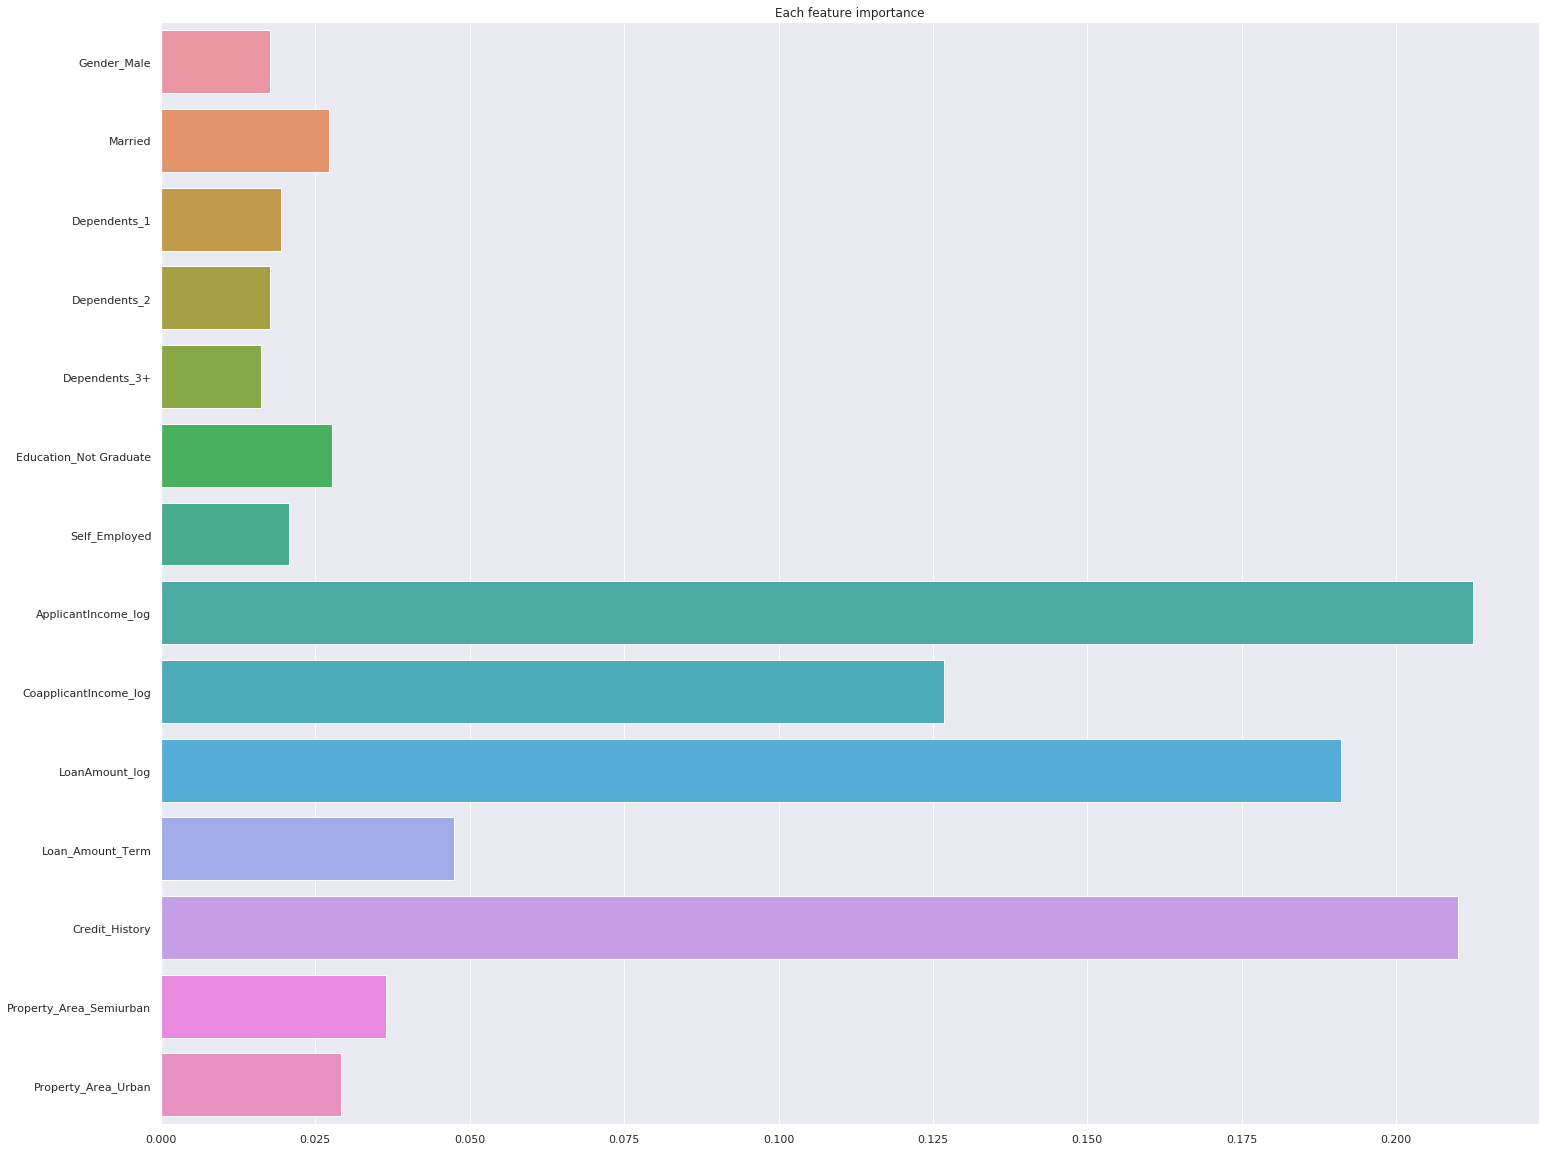

In [23]:
#analize the best features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns# Load dataset
sns.set(rc={'figure.figsize':(24.7,20.27)})

X = train_data.drop(columns = ['Loan_Status'])
y = train_data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 19)

model  = RandomForestClassifier()
model.fit(X_train, y_train)

#check the most importants features using the Random Forest Classifier
importances = pd.Series(data=model.feature_importances_, index=X.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title("Each feature importance")

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

X = train_data.drop(columns = ['Loan_Status'])
y = train_data['Loan_Status']

#select the best features
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=10)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(embeded_rf_feature)

['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Credit_History']


In [25]:
#random forest model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

best_columns_to_use = ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term',
                       'Credit_History', 'Married']

X = train_data.drop(columns = ['Loan_Status'])
y = train_data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 19)

parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 60,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'random_state' : 19}

rfc = RandomForestClassifier(**parameters)

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.8324324324324325

In [26]:
pred_test = rfc.predict(test_data)

submission = pd.read_csv("sample_submission_49d68Cx.csv")

submission['Loan_Status'] = pred_test 
submission['Loan_ID'] = original_test_data['Loan_ID']

submission['Loan_Status'] = submission['Loan_Status'].map({1 : 'Y', 0 : 'N'})

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('random_forest.csv', index = False)

In [27]:
#svc model
from sklearn.model_selection import train_test_split
from sklearn import svm

best_columns_to_use = ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term',
                       'Credit_History', 'Married']

X = train_data.drop(columns = ['Loan_Status'])
y = train_data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 19)

svc = svm.SVC(random_state = 10, kernel = 'linear')

svc.fit(X_train, y_train)

svc.score(X_test, y_test)

0.8324324324324325

In [28]:
pred_test = svc.predict(test_data)

submission = pd.read_csv("sample_submission_49d68Cx.csv")

submission['Loan_Status'] = pred_test 
submission['Loan_ID'] = original_test_data['Loan_ID']

submission['Loan_Status'] = submission['Loan_Status'].map({1 : 'Y', 0 : 'N'})

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('svc.csv', index = False)

In [29]:
#logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

best_columns_to_use = ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term',
                       'Credit_History', 'Married']

X = train_data.drop(columns = ['Loan_Status'])
y = train_data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 19)

lr = LogisticRegression(random_state = 0)

lr.fit(X_train, y_train)

lr.score(X_test, y_test)

/home/greca/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8324324324324325

In [30]:
pred_test = lr.predict(test_data)

submission = pd.read_csv("sample_submission_49d68Cx.csv")

submission['Loan_Status'] = pred_test 
submission['Loan_ID'] = original_test_data['Loan_ID']

submission['Loan_Status'] = submission['Loan_Status'].map({1 : 'Y', 0 : 'N'})

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('lr.csv', index = False)